[![londonr-banner-logo](londonr-banner.png)](https://www.londonr.org/)

In [1]:
<div style = "text-align: right"><font size = 3 color = "#B22222" face = "verdana"><b>- LondonR - Python for R Users - </b></font></div>
<div style = "text-align: right"><font><i>By 'Dayo Oguntoyinbo</i></font></div>
<div style = "text-align: right"><font>16th December 2019</font></div>

SyntaxError: invalid syntax (<ipython-input-1-73f5cba288c1>, line 1)

# Part D - Data Visualisation

In [2]:
# Options for all cells 
import pandas as pd
# change display setting of pandas
pd.set_option('display.notebook_repr_html', False)
# Setting the graphics
%matplotlib inline
# suppress all warnings (since anova gives a warning)
import warnings
warnings.filterwarnings("ignore")

tips = pd.read_csv("Data/tips.csv")

# Visualisation

The main plotting library in Python is **Matplotlib**. While **Matplotlib** is very powerful, till very recently, it took quite a lot of tweaking to make the plots look good.

**Seaborn** essentially treats **Matplotlib** as a core library and aims to make visualisation a central part of exploring and understanding data. It also has the goal of simplifying the process of creating more complicated plots, similar to the **ggplot2** package in R. While it does not implement a grammar of graphics, it does 

* create aesthetically pleasing plots by default
* create statistically meaningful plots
* understand the **pandas** `DataFrame` so the two work well together

The **seaborn** library contains functions to create a large number of different types of graphs. The most common graphs are listed below. For a full list of the **seaborn** plotting functions see [http://seaborn.pydata.org/api.html](http://seaborn.pydata.org/api.html).

| Plot Category | Plot Type                                  | Function     |
| :----------- | :-------------------------------------------| :--------------|
| Categorical | Categorical plots on a grid | `factorplot` |
|    | Box and whisker plot | `boxplot` |
|    | Point estimates and confidence intervals | `pointplot`  |
|    | Bar plot | `barplot` |
|    | Violin plot combining a box plot with a kernel density estimate | `violinplot` |
| Distribution | Histogram | `distplot`   |
|    | Plot pairwise relationships | `pairplot`   |
|    | Joint of two different plots | `jointplot`  |
| Regression | Scatter plots with linear regression fit across a grid| `lmplot`     |
|    | Scatter plot with linear regression fit | `regplot` |
|    | Plot the residuals of a linear regression | `residplot` |
| Matrix | Plot rectangular data as a color-encoded matrix | `heatmap` |
|    | Plot a matrix dataset as a hierarchically-clustered heatmap | `clustermap` |


The function `factorplot` is a wrapper function for the different individual plotting functions and takes a `kind` argument such as `box`, `point`, `bar` and `violin`.

[README: for seaborn 0.9.0]

| Plot Category | Plot Type                                  | Function     |
| :----------- | :-------------------------------------------| :--------------|
| Relational | Relational plots on a grid | `relplot` |
|    | Scatter plot | `scatterplot` |
|    | Line plot | `lineplot` |
| Categorical | Categorical plots on a grid | `catplot` |
|    | Box and whisker plot | `boxplot` |
|    | Point estimates and confidence intervals | `pointplot`  |
|    | Bar plot | `barplot` |
|    | Violin plot combining a box plot with a kernel density estimate | `violinplot` |
| Distribution | Histogram | `distplot`   |
|    | Plot pairwise relationships | `pairplot`   |
|    | Joint of two different plots | `jointplot`  |
| Regression | Scatter plots with linear regression fit across a grid| `lmplot`     |
|    | Scatter plot with linear regression fit | `regplot` |
|    | Plot the residuals of a linear regression | `residplot` |
| Matrix | Plot rectangular data as a color-encoded matrix | `heatmap` |
|    | Plot a matrix dataset as a hierarchically-clustered heatmap | `clustermap` |


[README: for seaborn 0.9.0]

The functions `relplot` and `catplot` are wrapper functions for the different individual plotting functions and take a `kind` argument such as `scatter` and `line` for relational plots and `box`, `point`, `bar` and `violin` for categorical plots.

**Tip**

For an online gallery showing examples of graphics built using **seaborn** see [http://seaborn.pydata.org/examples/](http://seaborn.pydata.org/examples/).

For the plots to show in line with the cells of our Jupyter notebook, instead of an external graphics viewer, we can change the Jupyter plot settings as follows:

In [3]:
import seaborn as sns
%matplotlib inline

To take a look at the relationship between the tip and the total amount of the bill in the tips dataset, we can use the `lmplot` function.

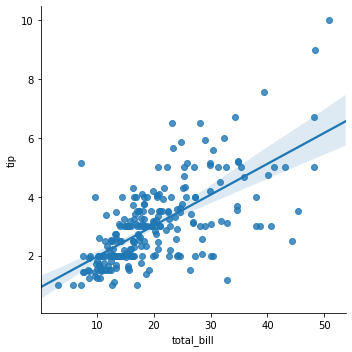

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tips);

Similarly to **ggplot2**, we can colour the points according to a variable very easily. Instead of setting a colour aesthetic, here we set the argument `hue` to the corresponding column name.

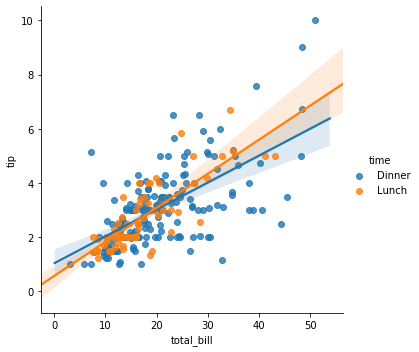

In [5]:
sns.lmplot(x="total_bill", y="tip", hue="time", data=tips);

## Panelling (Faceting)

If we want to explore a relationship like that between tip and total amount of the bill for more groups, using colour to distinguish between groups can result in plots that are hard to read. An alternative in those situations can be to plot the data in separate panels. In **ggplot2** this is also called faceting. 

While in **ggplot2** we add a facet layer to our plot, in **seaborn** we first create a grid object and then map a plotting function onto the grid. The grids available in **seaborn** are facet grids, pair grids and joint grids. Here we focus on facet grids which allow us to create plots on a grid defined by rows and columns. For details on the other types of grids, see [http://seaborn.pydata.org/api.html](http://seaborn.pydata.org/api.html).

For categorical and regression plots, the functions `factorplot` and `lmplot` provide an convenience interface which takes care of the paneling on a facet grid for us. All we have to specify, via the `row` and `col` arguments, is which variables should be used for rows and columns of the grid.

For example, if we wish to plot a `lmplot` for the tips data set, with `tip` against `total_bill` for each day, we get the following graph:

[README: for seaborn 0.9.0]

For relational, categorical and regression plots, the functions `relplot`, `catplot` and `lmplot` provide an convenience interface which takes care of the paneling on a facet grid for us. All we have to specify, via the `row` and `col` arguments, is which variables should be used for rows and columns of the grid.

For example, if we wish to plot a `lmplot` for the tips data set, with `tip` against `total_bill` for each day, we get the following graph:

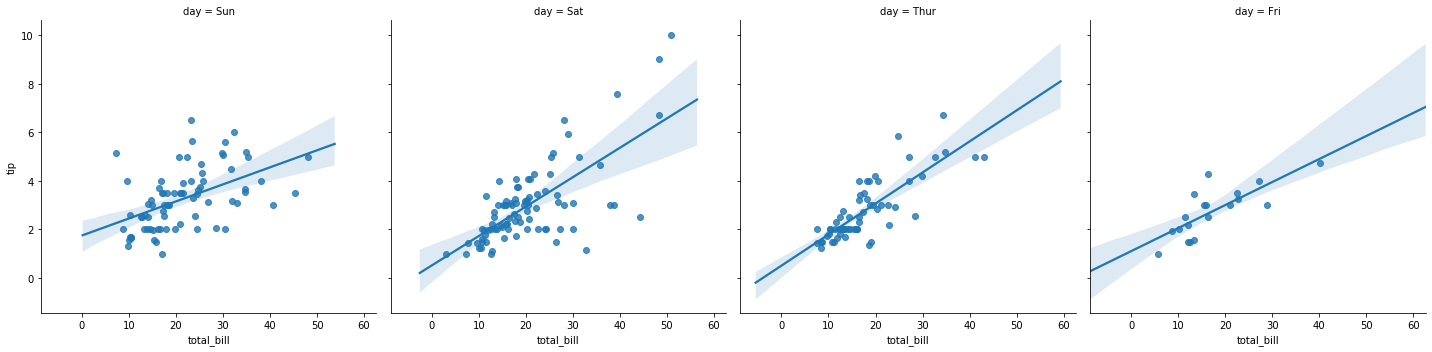

In [6]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips);

The general approach to paneling with **seaborn** is illustrated below.

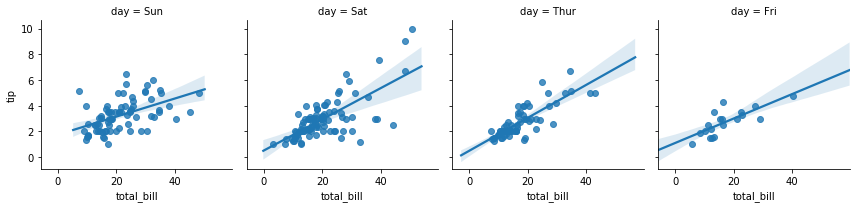

In [7]:
g = sns.FacetGrid(tips, col="day")
g.map(sns.regplot, "total_bill", "tip");
#g.map_dataframe(sns.regplot, x="total_bill", y="tip");

## Controlling the Appearance

To customise our plots, we can 

- change the context of the plot
- pick a style
- use a specific colour palette

These can be set directly via the `sns.set_context`, `sns.set_style` and `sns.set_palette` functions or together via the `sns.set` function.

The context has no direct corresponding element in **ggplot2**: this defines the scaling of the plot (font, axes, and content) as appropriate for a `paper`, `notebook`, `talk` or `poster`.

The style corresponds to **ggplot2**'s themes: Available styles are `white`, `dark`, `whitegrid`, `darkgrid`, and `ticks`.

The following pre-defined colour palettes are available: `deep`, `muted`, `bright`, `pastel`, `dark`, and `colorblind`. Further palettes can be defined with the `sns.color_palette` function.

**Exercise**

1. Make a scatterplot with a regression line for `tip` against `total_bill` and differentiate between smokers and non-smokers via colour.
2. Make a scatterplot with a regression line for `tip` against `total_bill` and use a separate panel for each party `size`.

Extension:

3. Set the context to `notebook`, use a `dark` style, and a `bright` colour palette and redo the plot from exercise 1 - how do the two plots compare?
4. Plot the pairwise relationships in the tips dataset.

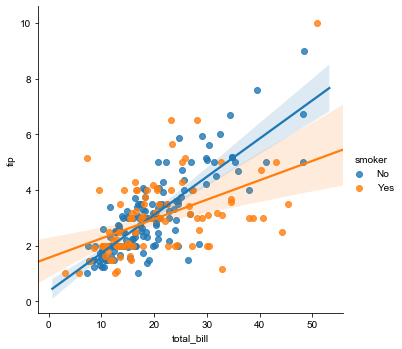

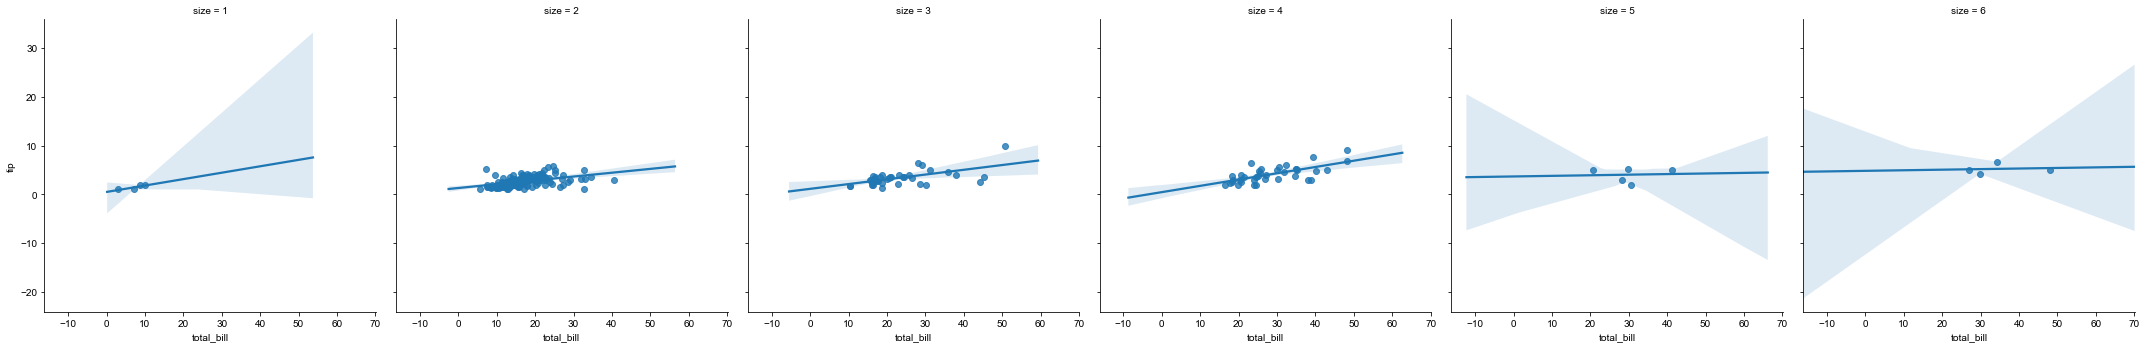

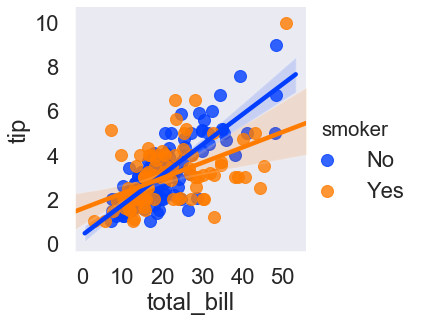

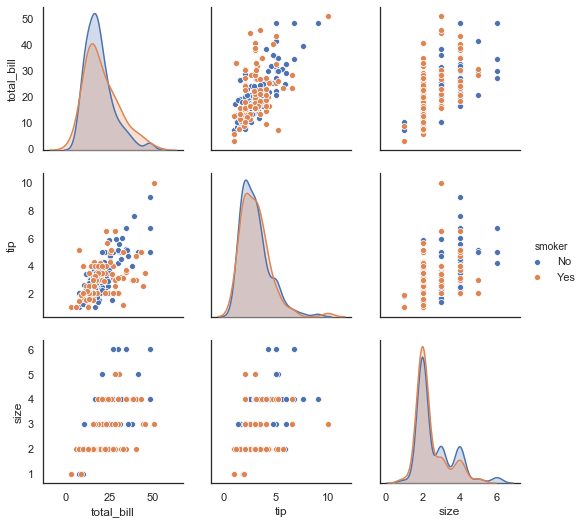

In [8]:
# Solution
#sns.set(context="notebook", style="white", palette="deep")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);  
sns.lmplot(x="total_bill", y="tip", col="size", data=tips);

#sns.factorplot(x="smoker", y="tip", col="time", data=tips, kind="box");
#sns.boxplot(x="smoker", y="tip", data=tips);
#sns.distplot(tips['total_bill'], hist=True, kde=True, color="orange");
#sns.jointplot(x="total_bill", y="tip", data=tips);

sns.set(context="poster", style="dark", palette="bright")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);  

sns.set(context="notebook", style="white", palette="deep")
sns.pairplot(tips, hue="smoker");

[![Creative Commons License](http://i.creativecommons.org/l/by-nc-nd/3.0/88x31.png)](http://creativecommons.org/licenses/by-nc-nd/3.0/)